In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_NL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,...,0.0,0.0,NaN,0.0,0,0.0,0.0,0.0,2.0,0.0
1,1.0,1.0,2.0,0.0,NaN,0.0,3.0,0.0,3.0,0.0,...,0.0,NaN,0.0,0.0,0,2.0,2.0,NaN,NaN,7.0
2,2.0,2.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,...,0.0,NaN,0.0,2.0,0,3.0,3.0,2.0,0.0,7.0
3,2.0,2.0,2.0,1.0,0.0,0.0,2.0,NaN,2.0,2.0,...,0.0,0.0,0.0,2.0,0,2.0,2.0,2.0,0.0,7.0
4,2.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,3.0,0,2.0,2.0,NaN,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,2.0,0.0,2.0,1.0,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,NaN,3.0,0,0.0,0.0,3.0,0.0,70.0
354,2.0,3.0,2.0,NaN,0.0,0.0,0.0,0.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,NaN
355,2.0,NaN,2.0,1.0,0.0,NaN,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,2.0,0,0.0,0.0,2.0,0.0,70.0
356,2.0,NaN,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,0,0.0,0.0,1.0,0.0,70.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	35
float64		column 2	69
float64		column 3	17
float64		column 4	35
float64		column 5	51
float64		column 6	69
float64		column 7	18
float64		column 8	34
float64		column 9	52
float64		column 10	34
float64		column 11	17
int64		column 12	0
float64		column 13	35
float64		column 14	52
float64		column 15	35
float64		column 16	34
float64		column 17	35
float64		column 18	51
float64		column 19	17
float64		column 20	17
float64		column 21	51
float64		column 22	35
float64		column 23	51
float64		column 24	52
float64		column 25	34
float64		column 26	51
float64		column 27	35
float64		column 28	18
int64		column 29	0
float64		column 30	52
float64		column 31	18
float64		column 32	17
float64		column 33	34
float64		column 34	18


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,323.000000,289.000000,341.000000,323.000000,307.000000,289.000000,340.000000,324.000000,306.000000,324.000000,...,324.000000,307.000000,323.000000,340.000000,358.000000,306.000000,340.000000,341.000000,324.000000,340.000000
mean,2.077399,1.792388,1.568915,1.349845,0.570033,0.401384,0.179412,0.348765,0.591503,0.469136,...,0.388889,0.400651,0.452012,0.926471,0.458101,0.111111,0.123529,1.888563,0.527778,36.458824
std,0.647655,0.665476,0.890523,1.108224,0.857958,0.915604,0.590125,0.801681,0.951165,0.877464,...,0.838324,0.807886,0.942453,1.114614,0.959796,0.472948,0.506045,0.676856,1.085722,15.131910
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,36.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.250000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

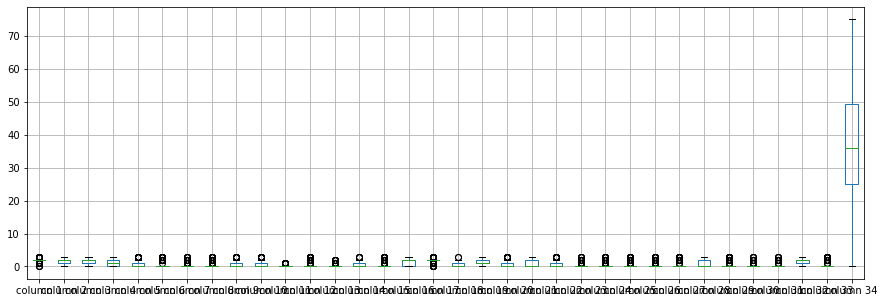

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.077399
column 2      1.792388
column 3      1.568915
column 4      1.349845
column 5      0.570033
column 6      0.401384
column 7      0.179412
column 8      0.348765
column 9      0.591503
column 10     0.469136
column 11     0.126100
column 12     0.410615
column 13     0.120743
column 14     0.519608
column 15     0.287926
column 16     1.391975
column 17     1.965944
column 18     0.475570
column 19     1.299120
column 20     0.624633
column 21     0.905537
column 22     0.616099
column 23     0.263844
column 24     0.303922
column 25     0.388889
column 26     0.400651
column 27     0.452012
column 28     0.926471
column 29     0.458101
column 30     0.111111
column 31     0.123529
column 32     1.888563
column 33     0.527778
column 34    36.458824
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.398930,0.217183,-0.065258,-0.024970,0.040974,-0.112494,0.001694,0.143418,0.193652,...,0.012556,0.101426,0.046159,0.076686,0.006769,-0.000824,-0.004489,0.087761,0.004421,0.016018
column 2,0.398930,1.000000,0.291408,-0.095344,-0.004051,-0.101260,-0.102229,-0.068182,0.256857,0.306950,...,-0.097840,0.137390,-0.074234,0.073879,-0.097782,-0.015117,-0.028979,-0.003336,-0.144151,0.008837
column 3,0.217183,0.291408,1.000000,-0.083153,0.238411,0.319705,-0.182755,0.264375,0.267031,0.220479,...,0.276619,0.307802,0.264824,-0.252279,0.268654,-0.097341,-0.139540,0.140309,0.286012,0.125672
column 4,-0.065258,-0.095344,-0.083153,1.000000,0.235997,0.374631,-0.182328,0.333174,-0.275189,-0.113539,...,0.374986,-0.196284,0.367072,-0.006990,0.367736,-0.207925,-0.212206,0.081695,0.400058,0.070315
column 5,-0.024970,-0.004051,0.238411,0.235997,1.000000,0.358738,-0.162975,0.365771,-0.054617,-0.002532,...,0.336746,-0.012279,0.376725,0.042290,0.360097,-0.149471,-0.161858,0.117922,0.388058,0.058526
column 6,0.040974,-0.101260,0.319705,0.374631,0.358738,1.000000,-0.138560,0.837691,-0.246491,-0.220991,...,0.893641,-0.177963,0.902827,0.101904,0.892486,-0.099330,-0.106140,0.203568,0.885847,0.085716
column 7,-0.112494,-0.102229,-0.182755,-0.182328,-0.162975,-0.138560,1.000000,-0.135372,0.268924,-0.038756,...,-0.126692,-0.157105,-0.147781,-0.005905,-0.146182,0.793502,0.843815,-0.109119,-0.138109,-0.405408
column 8,0.001694,-0.068182,0.264375,0.333174,0.365771,0.837691,-0.135372,1.000000,-0.270211,-0.241741,...,0.869402,-0.136083,0.865640,0.153455,0.867417,-0.096267,-0.107839,0.258196,0.862766,0.126824
column 9,0.143418,0.256857,0.267031,-0.275189,-0.054617,-0.246491,0.268924,-0.270211,1.000000,0.617440,...,-0.249029,0.386564,-0.272489,-0.392461,-0.269974,0.270424,0.288164,-0.125489,-0.236190,-0.149274
column 10,0.193652,0.306950,0.220479,-0.113539,-0.002532,-0.220991,-0.038756,-0.241741,0.617440,1.000000,...,-0.245583,0.470096,-0.238973,-0.390740,-0.245321,-0.041568,-0.029868,-0.013216,-0.216867,0.010918


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+45,34+45+45,34+45+45+45,34+45+45+45+45,34+45+45+45+45+45,34+45+45+45+45+45+45,34+45+45+45+45+45+45+45,34+45+45+45+45+45+45,34+45+45+45+45+45,34+45+45+45+45,34+45+45+45,34+45+45,34+45,34], vae_layer = False, seed = 45)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 70.21212855252352
Epoch: 1 , loss: 69.7780090678822
Epoch: 2 , loss: 69.68407474864613
Epoch: 3 , loss: 70.23516152121805
Epoch: 4 , loss: 69.41308645768599
Epoch: 5 , loss: 69.03849289634012
Epoch: 6 , loss: 65.72682519392534
Epoch: 7 , loss: 64.39264176108621
Epoch: 8 , loss: 63.55891349098899
Epoch: 9 , loss: 63.408762671730734
Epoch: 10 , loss: 62.312267476862125
Epoch: 11 , loss: 62.0059138211337
Epoch: 12 , loss: 61.673967534845524
Epoch: 13 , loss: 61.47751946882768
Epoch: 14 , loss: 61.469922672618516
Epoch: 15 , loss: 60.75291980396617
Epoch: 16 , loss: 60.99658931385387
Epoch: 17 , loss: 61.031099839644
Epoch: 18 , loss: 60.40358768809926
Epoch: 19 , loss: 60.22052019292658
Epoch: 20 , loss: 59.875829523259945
Epoch: 21 , loss: 59.62730754505504
Epoch: 22 , loss: 59.7636214169589
Epoch: 23 , loss: 59.4230298128995
Epoch: 24 , loss: 59.441668943925336
Epoch: 25 , loss: 59.07925050908869
Epoch:

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.000000
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      2.000000
column 8      0.000000
column 9      3.000000
column 10     0.271748
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     1.000000
column 15     0.000000
column 16     1.000000
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.352658
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     1.000000
column 32     1.000000
column 33     1.000000
column 34    12.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.0,0.215657,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,...,0.0,0.000000,0.271205,0.0,0,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,0.000000,0.0,0.000000,0.469139,0.000000,0.000000,0.00000,0.000000,0.0,...,0.0,0.279232,0.000000,0.0,0,0.0,0.0,-0.676142,0.412826,0.000000
2,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,...,0.0,0.203759,0.000000,0.0,0,0.0,0.0,0.000000,0.000000,0.000000
3,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.04254,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0,0.0,0.0,0.000000,0.000000,0.000000
4,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0,0.0,0.0,-0.866682,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.0,0.000000,0.0,0.000000,0.000000,0.362956,0.110041,0.00000,0.000000,0.0,...,0.0,0.000000,0.482536,0.0,0,0.0,0.0,0.000000,0.000000,0.000000
354,0.0,0.000000,0.0,1.061559,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0,0.0,0.0,0.000000,0.000000,-51.422741
355,0.0,-0.616879,0.0,0.000000,0.000000,0.343792,0.000000,0.00000,0.366621,0.0,...,0.0,0.000000,0.000000,0.0,0,0.0,0.0,0.000000,0.000000,0.000000
356,0.0,0.411704,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,...,0.0,0.010514,0.000000,0.0,0,0.0,0.0,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(108.06750655761724, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.14255562441531827

In [18]:
new_df.iloc[66,:]

column 1      2.000000
column 2      0.954126
column 3      0.000000
column 4      3.000000
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.238941
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13    -0.002517
column 14     0.247675
column 15     2.000000
column 16     2.000000
column 17     2.000000
column 18     0.000000
column 19     0.000000
column 20     0.000000
column 21     3.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     2.000000
column 33     0.000000
column 34    17.201338
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,1.215657,1.0,1.000000,1.000000,0.000000,0.000000,0.00000,2.000000,2.0,...,0.0,0.000000,0.271205,0.0,0,0.0,0.0,0.000000,2.000000,0.000000
1,1.0,1.000000,2.0,0.000000,0.469139,0.000000,3.000000,0.00000,3.000000,0.0,...,0.0,0.279232,0.000000,0.0,0,2.0,2.0,1.323858,0.412826,7.000000
2,2.0,2.000000,1.0,0.000000,0.000000,0.000000,3.000000,0.00000,2.000000,0.0,...,0.0,0.203759,0.000000,2.0,0,3.0,3.0,2.000000,0.000000,7.000000
3,2.0,2.000000,2.0,1.000000,0.000000,0.000000,2.000000,0.04254,2.000000,2.0,...,0.0,0.000000,0.000000,2.0,0,2.0,2.0,2.000000,0.000000,7.000000
4,2.0,2.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.00000,2.000000,0.0,...,0.0,0.000000,0.000000,3.0,0,2.0,2.0,1.133318,0.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,2.000000,0.0,2.000000,1.000000,0.362956,0.110041,0.00000,0.000000,0.0,...,0.0,0.000000,0.482536,3.0,0,0.0,0.0,3.000000,0.000000,70.000000
354,2.0,3.000000,2.0,1.061559,0.000000,0.000000,0.000000,0.00000,3.000000,2.0,...,0.0,0.000000,0.000000,0.0,0,0.0,0.0,1.000000,0.000000,18.577259
355,2.0,1.383121,2.0,1.000000,0.000000,0.343792,0.000000,0.00000,0.366621,0.0,...,0.0,0.000000,0.000000,2.0,0,0.0,0.0,2.000000,0.000000,70.000000
356,2.0,1.411704,0.0,3.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,...,0.0,0.010514,0.000000,0.0,0,0.0,0.0,1.000000,0.000000,70.000000


In [20]:
imputations[-1].to_excel("DERM_NL_10(imp).xlsx", index=False, header=False)